<center><h5>OPEN DATA PROJECT</h5></center>


<center><h1>THEFT IN RESIDENTIAL DEVELOPMENTS</h1></center>

<center><h1>-</h1></center>

<center><small>ELIJAH ESMERO</small></center>

<center><img src="images/crime_data_webpage.png"></center>

<center><img src="images/land_value_data_webpage.png"></center>

<center><img src="images/raw_sydney_map.png"></center>

<center><img src="images/edited_sydney_map.png"></center>

<center><img src="images/marsdenpark_annual_progression/map_20130816.png"></center>

<center><img src="images/marsdenpark_annual_progression/map_20190719.png"></center>

<center><img src="images/marsdenpark_theft_facebookposts/theft collage.png"></center>

<center><h1>DO RESIDENTIAL DEVELOPMENTS EXPERIENCE MORE THEFT?</h1></center>

<center><h3>OR RATHER...</h3></center>

<center><h1>DOES THE "THEFT PER HOUSE" IN A SUBURB INCREASE AS THE NUMBER OF HOUSES INCREASES?</h1></center>

<center><h1>NUMBER OF HOUSES IN EACH SUBURB</h1></center>

<center><img src="images/land_value_data_webpage.png"></center>

The "DOWNLOADING LAND VALUE DATASET" section contains code which will download any missing monthly datasets between JULY 2017 - JULY 2019 from the valuergeneral.nsw.gov.au website. It utilises pathlib so that it is usable on both Windows and Mac computers.

In [1]:
# ==============================
# DOWNLOADING LAND VALUE DATASET
# ==============================

required_lv_zipfiles_list = [
 'LV_20170701.zip',
 'LV_20170801.zip',
 'LV_20170901.zip',
 'LV_20171001.zip',
 'LV_20171101.zip',
 'LV_20171201.zip',
 'LV_20180101.zip',
 'LV_20180201.zip',
 'LV_20180301.zip',
 'LV_20180401.zip',
 'LV_20180501.zip',
 'LV_20180601.zip',
 'LV_20180701.zip',
 'LV_20180801.zip',
 'LV_20180901.zip',
 'LV_20181001.zip',
 'LV_20181101.zip',
 'LV_20181201.zip',
 'LV_20190101.zip',
 'LV_20190201.zip',
 'LV_20190301.zip',
 'LV_20190401.zip',
 'LV_20190501.zip',
 'LV_20190601.zip',
 'LV_20190701.zip']

In [48]:
# ==============================
# DOWNLOADING LAND VALUE DATASET
# ==============================

import requests
from pathlib import Path

def download_files_if_not_downloaded(required_files_list, local_directory, base_url, glob_pattern):
    local_files_path_list = sorted(local_directory.glob(glob_pattern))
    local_files_list = [path.name for path in local_files_path_list]
    
    for required_file in required_files_list:
        if required_file not in local_files_list: 
            url = base_url + required_file

            # download file from url
            r = requests.get(url, stream = True)
            while True:
                if r.status_code is 200:
                    print("downloading " + required_file)
                    with open(local_directory / required_file,"wb") as f:
                        f.write(r.content)
                    break

    print("All required files are downloaded")

    
local_lv_directory = Path("data/land_value_data")

lv_base_url = "https://www.valuergeneral.nsw.gov.au/land_value_summaries/lvfiles/"

download_files_if_not_downloaded(required_lv_zipfiles_list,
                                 local_lv_directory,
                                 lv_base_url,
                                 "*.zip")

# revise paths of local zip files
local_lv_zipfile_path_list = sorted(local_lv_directory.glob("**/*.zip"))

All required files are downloaded


<center><img src="images/zipfile_extraction_size_difference.png"></center>

<center><img src="images/zipfile_contents.png"></center>

In [ ]:


The dtype_dict is a 

In [3]:
# ============================
# ACCESSING LAND VALUE DATASET
# ============================

dtype_dict={"DISTRICT CODE": int, 
            "DISTRICT NAME": str,
            "PROPERTY ID": int,
            "PROPERTY TYPE": str,
            "PROPERTY NAME": str,
            "UNIT NUMBER": str,
            "HOUSE NUMBER": str,
            "STREET NAME": str,
            "SUBURB NAME": str,
            "POSTCODE": float,
            "PROPERTY DESCRIPTION": str,
            "ZONE CODE": str,
            "AREA": float,
            "AREA TYPE": str,
            "BASE DATE 1": str,
            "LAND VALUE 1": float,
            "AUTHORITY 1": str,
            "BASIS 1": str,
            "BASE DATE 2": str,
            "LAND VALUE 2": float,
            "AUTHORITY 2": str,
            "BASIS 2": str,
            "BASE DATE 3": str,
            "LAND VALUE 3": float,
            "AUTHORITY 3": str,
            "BASIS 3": str,
            "BASE DATE 4": str,
            "LAND VALUE 4": float,
            "AUTHORITY 4": str,
            "BASIS 4": str,
            "BASE DATE 5": str,
            "LAND VALUE 5": float,
            "AUTHORITY 5": str,
            "BASIS 5": str,
            "Unnamed: 34": str}

In [60]:
# ============================
# ACCESSING LAND VALUE DATASET
# ============================

import zipfile
import pandas as pd

def concat_all_csv_in_zipfile_into_one_df(zipfile_path):
    with zipfile.ZipFile(zipfile_path) as zip:
        csv_in_zipfile_list = [name for name in zip.namelist() if name.endswith('.csv')] # to only get csv files
        df = pd.concat([pd.read_csv(zip.open(csv),
                                    encoding="ISO-8859-1",
                                    error_bad_lines=False,
                                    dtype=dtype_dict) for csv in csv_in_zipfile_list], sort=False)
    return df

lv_data_201907 = concat_all_csv_in_zipfile_into_one_df(local_lv_zipfile_path_list[-1])
lv_data_201907

<center><h1>HOW DO I KNOW THAT THE LAND LISTING IS FOR A HOUSE?</h1></center>

In [5]:
# ================================
# DETERMINING CRITERIA FOR A HOUSE
# ================================

list(lv_data_201907.columns)

['DISTRICT CODE',
 'DISTRICT NAME',
 'PROPERTY ID',
 'PROPERTY TYPE',
 'PROPERTY NAME',
 'UNIT NUMBER',
 'HOUSE NUMBER',
 'STREET NAME',
 'SUBURB NAME',
 'POSTCODE',
 'PROPERTY DESCRIPTION',
 'ZONE CODE',
 'AREA',
 'AREA TYPE',
 'BASE DATE 1',
 'LAND VALUE 1',
 'AUTHORITY 1',
 'BASIS 1',
 'BASE DATE 2',
 'LAND VALUE 2',
 'AUTHORITY 2',
 'BASIS 2',
 'BASE DATE 3',
 'LAND VALUE 3',
 'AUTHORITY 3',
 'BASIS 3',
 'BASE DATE 4',
 'LAND VALUE 4',
 'AUTHORITY 4',
 'BASIS 4',
 'BASE DATE 5',
 'LAND VALUE 5',
 'AUTHORITY 5',
 'BASIS 5',
 'Unnamed: 34']

- ## ~~LAND VALUE~~


- ## PROPERTY NAME
- ## AREA

In [6]:
# ================================
# DETERMINING CRITERIA FOR A HOUSE
# ================================

sorted(lv_data_201907["PROPERTY NAME"][~lv_data_201907["PROPERTY NAME"].isnull()].unique())

[' ',
 ' ACCESS, COMMON ROOM & LANDSCAPED AREA',
 ' ALBURY HIGH SCHOOL',
 ' ASSISTANT STATION MASTERS RESIDENCE',
 ' BABY HEALTH CENTRE',
 ' BICENTENNIAL FLORA PARK',
 ' BLOOMVALE',
 ' BOWRAL HIGH SCHOOL',
 ' BUILDING F',
 ' COOPER PARK (PART)',
 ' DEDICATED PUBLIC RESERVE',
 ' DEGOTARDI PARK',
 ' FARM 268',
 ' FEURBAIX',
 ' GHOST GUMS',
 ' GIRL GUIDES HALL',
 ' GREEN POINT OBSERVATORY',
 ' GUNDY & MAXWELLTON',
 ' HALL',
 ' HILDA GARDENS',
 ' JETTY ADJOINING',
 ' JOHN WRIGHT PARK',
 ' KARINYA',
 ' KENDALL RESERVE',
 ' KOORINGLE',
 ' KULOO',
 ' LOT 15 ',
 ' LT 1 ',
 " LUND'S",
 ' MCDONALDS',
 ' NANAMI',
 ' NATIONAL PARK',
 ' PART BUCKIE STATION',
 ' PART DENMAN GOLF COURSE',
 ' PART RAILWAY LANDS',
 ' PART TAYLORS PLAINS',
 ' PART WILGAROON',
 ' PSH BINDOGUNDRA',
 ' PT KINGSFORD SMITH PARK',
 ' R 65994 PART FRANCIS PARK  RERVE',
 ' RECREATION DR',
 ' RIVERSIDE THEATRE',
 ' SANDELL',
 ' SHOP 2.2',
 ' SITE 27',
 ' SITE 28',
 ' ST CUTHBERTS ANGLICAN CHURCH',
 ' STUCKEYS CREEK',
 ' TELEPHON

In [7]:
# ================================
# DETERMINING CRITERIA FOR A HOUSE
# ================================

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

lv_data_201907_area_hist = lv_data_201907["AREA"][(lv_data_201907["AREA TYPE"] == "M") & \
                                                  ~lv_data_201907["PROPERTY NAME"].isnull()].hist(range=(0,2500), bins=25)
plt.xlabel("LAND AREA (M^2)")
plt.ylabel("FREQUENCY")
plt.title("HISTOGRAM OF THE LAND AREA OF LISTINGS WITH A PROPERTY NAME FIELD")


# format axes
lv_data_201907_area_hist.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
lv_data_201907_area_hist.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

<function matplotlib.pyplot.show(*args, **kw)>

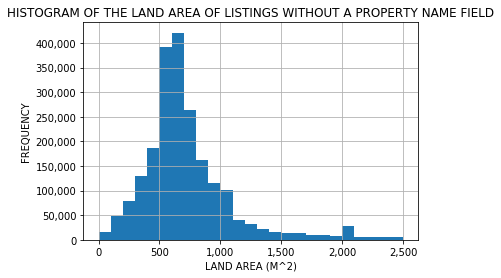

In [8]:
# ================================
# DETERMINING CRITERIA FOR A HOUSE
# ================================

lv_data_201907_area_hist = lv_data_201907["AREA"][(lv_data_201907["AREA TYPE"] == "M") & \
                                                  lv_data_201907["PROPERTY NAME"].isnull()].hist(range=(0,2500), bins=25)
plt.xlabel("LAND AREA (M^2)")
plt.ylabel("FREQUENCY")
plt.title("HISTOGRAM OF THE LAND AREA OF LISTINGS WITHOUT A PROPERTY NAME FIELD")

# format axes
lv_data_201907_area_hist.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
lv_data_201907_area_hist.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show

In [9]:
# ===================================
# AGGREGATING SUBURB HOUSE COUNT DATA
# ===================================

def get_suburb_house_count_from_lv_dataset(lv_dataset):
    suburb_house_count = lv_dataset[lv_dataset["PROPERTY NAME"].isnull() & \
                                                 (lv_dataset["AREA TYPE"] == "M") & \
                                                 (lv_dataset["AREA"] > 200) & \
                                                 (lv_dataset["AREA"] < 1000)].groupby("SUBURB NAME").count().max(axis=1)
    return suburb_house_count
    
get_suburb_house_count_from_lv_dataset(lv_data_201907)

SUBURB NAME
ABBOTSBURY           1132
ABBOTSFORD            866
ABERCROMBIE           197
ABERDARE              316
ABERDEEN              345
ABERGLASSLYN         1657
ABERMAIN              603
ABERNETHY              19
ACACIA CREEK            1
ACACIA GARDENS       1048
ADAMINABY             109
ADAMSTOWN            1983
ADAMSTOWN HEIGHTS    1880
ADELONG                68
ADJUNGBILLY             1
AFTERLEE                1
AGNES BANKS           110
AIRDS                1129
AKOLELE                50
ALBERT                  5
ALBION PARK          4168
ALBION PARK RAIL     2072
ALBURY               1920
ALDAVILLA              22
ALECTOWN                1
ALEXANDRIA            344
ALFORDS POINT         892
ALFREDTOWN              4
ALICE                   1
ALLAMBIE HEIGHTS     1960
                     ... 
YALLAROI                1
YALWAL                  1
YAMBA                2387
YANCO                  49
YANDERRA               26
YARRAGUNDRY             1
YARRAHAPINNI            8


In [103]:
# ===================================
# AGGREGATING SUBURB HOUSE COUNT DATA
# ===================================

import time

start_time = time.time()

# get the house count for all monthly data
NSW_suburb_house_count_df = pd.concat([get_suburb_house_count_from_lv_dataset(concat_all_csv_in_zipfile_into_one_df(local_zipfile)) \
                                       for local_zipfile in local_lv_zipfile_path_list], sort=False, axis=1)

elapsed_time = time.time() - start_time
print("This function took " + str(elapsed_time) + " seconds")

NSW_suburb_house_count_df

This function took 479.29569721221924 seconds


0       1       2       3       4       5       6   \
ABBOTSBURY         1130.0  1130.0  1130.0  1130.0  1132.0  1132.0  1132.0   
ABBOTSFORD          864.0   864.0   864.0   864.0   864.0   864.0   864.0   
ABERCROMBIE         184.0   184.0   184.0   184.0   196.0   196.0   196.0   
ABERDARE            314.0   314.0   314.0   314.0   314.0   314.0   314.0   
ABERDEEN            343.0   343.0   343.0   343.0   343.0   343.0   343.0   
ABERGLASSLYN       1552.0  1582.0  1582.0  1582.0  1583.0  1601.0  1601.0   
ABERMAIN            599.0   599.0   599.0   599.0   599.0   601.0   601.0   
ABERNETHY            19.0    19.0    19.0    19.0    19.0    19.0    19.0   
ACACIA CREEK          1.0     1.0     1.0     1.0     1.0     1.0     1.0   
ACACIA GARDENS     1048.0  1048.0  1048.0  1048.0  1048.0  1048.0  1048.0   
ADAMINABY           109.0   109.0   109.0   109.0   109.0   109.0   109.0   
ADAMSTOWN          1980.0  1981.0  1979.0  1980.0  1980.0  1982.0  1981.0   
ADAMSTOWN HEIGHTS  1880.0  1880.0  1880.0  1880.0  1880.0  1879.0  1879.0   
ADELONG              68.0    68.0    68.0    68.0    68.0    68.0    68.0   
ADJUNGBILLY           1.0     1.0     1.0     1.0     1.0     1.0     1.0   
AFTERLEE              1.0     1.0     1.0     1.0     1.0     1.0     1.0   
AGNES BANKS         109.0   109.0   109.0   109.0   109.0   109.0   108.0   
AIRDS              1116.0  1116.0  1116.0  1117.0  1117.0  1117.0  1117.0   
AKOLELE              50.0    50.0    50.0    50.0    50.0    50.0    50.0   
ALBERT                5.0     5.0     5.0     5.0     5.0     5.0     5.0   
ALBION PARK        4018.0  4018.0  4020.0  4020.0  4027.0  4029.0  4042.0   
ALBION PARK RAIL   2060.0  2060.0  2062.0  2062.0  2062.0  2062.0  2064.0   
ALBURY             1913.0  1913.0  1912.0  1912.0  1911.0  1912.0  1912.0   
ALDAVILLA            22.0    22.0    22.0    22.0    22.0    22.0    22.0   
ALECTOWN              1.0     1.0     1.0     1.0     1.0     1.0     1.0   
ALEXANDRIA          350.0   350.0   350.0   350.0   350.0   350.0   350.0   
ALFORDS POINT       892.0   892.0   892.0   892.0   892.0   892.0   892.0   
ALFREDTOWN            3.0     3.0     3.0     3.0     3.0     3.0     3.0   
ALICE                 1.0     1.0     1.0     1.0     1.0     1.0     1.0   
ALLAMBIE HEIGHTS   1960.0  1960.0  1960.0  1960.0  1960.0  1960.0  1960.0   
...                   ...     ...     ...     ...     ...     ...     ...   
ZETLAND              72.0    72.0    72.0    72.0    72.0    72.0    72.0   
LOUTH PARK            NaN     1.0     1.0     1.0     1.0     1.0     1.0   
NUMERALLA             NaN     1.0     NaN     NaN     NaN     NaN     NaN   
BAW BAW               NaN     NaN     1.0     1.0     1.0     1.0     1.0   
CATHERINE FIELD       NaN     NaN   112.0   112.0   110.0   110.0   110.0   
GIRRAL                NaN     NaN     1.0     1.0     1.0     1.0     1.0   
JELLAT JELLAT         NaN     NaN     NaN     NaN     1.0     1.0     1.0   
LIMEKILNS             NaN     NaN     NaN     NaN     2.0     2.0     2.0   
FAILFORD              NaN     NaN     NaN     NaN     NaN     1.0     1.0   
HUNTLEY               NaN     NaN     NaN     NaN     NaN     2.0     2.0   
SHEEDYS GULLY         NaN     NaN     NaN     NaN     NaN     NaN     6.0   
TENANDRA              NaN     NaN     NaN     NaN     NaN     NaN     1.0   
WIRLINGA              NaN     NaN     NaN     NaN     NaN     NaN    27.0   
CANADIAN LEAD         NaN     NaN     NaN     NaN     NaN     NaN     NaN   
LEN WATERS ESTATE     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
COOPERS GULLY         NaN     NaN     NaN     NaN     NaN     NaN     NaN   
KENTUCKY SOUTH        NaN     NaN     NaN     NaN     NaN     NaN     NaN   
LITTLE BACK CREEK     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
MARYVALE              NaN     NaN     NaN     NaN     NaN     NaN     NaN   
KOOKABOOKRA           NaN     NaN     NaN     NaN     NaN     NaN     NaN   
KANGAROO CREEK     

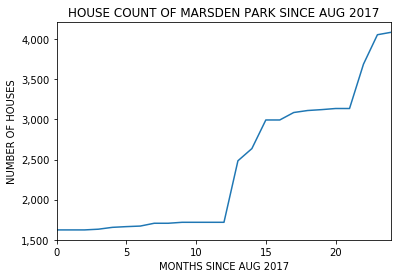

In [69]:
# ========================
# MARSDEN PARK HOUSE COUNT
# ========================

marsdenpark_house_count_timeseries_plot = suburb_house_count.loc["MARSDEN PARK"].plot()

# format graph
plt.xlabel("MONTHS SINCE JULY 2017")
plt.ylabel("NUMBER OF HOUSES")
plt.title("HOUSE COUNT OF MARSDEN PARK SINCE JULY 2017")
marsdenpark_house_count_timeseries_plot.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

<center><h1>AMOUNT OF THEFTS IN EACH SUBURB</h1></center>

<center><img src="images/crime_data_webpage.png"></center>

In [47]:
# =========================
# DOWNLOADING CRIME DATASET
# =========================

required_crime_zipfile = ["SuburbData.zip"]

crime_local_directory = Path("data")

crime_base_url = "https://www.bocsar.nsw.gov.au/Documents/Datasets/"

download_files_if_not_downloaded(required_crime_zipfile,
                                 crime_local_directory,
                                 crime_base_url,
                                 "*.zip")

downloading SuburbData.zip
All required files are downloaded


In [63]:
# =======================
# ACCESSING CRIME DATASET
# =======================

NSW_crime_df = concat_all_csv_in_zipfile_into_one_df(crime_local_directory / required_crime_zipfile[0])
NSW_crime_df

Suburb                           Offence category  \
0       Aarons Pass                                   Homicide   
1       Aarons Pass                                   Homicide   
2       Aarons Pass                                   Homicide   
3       Aarons Pass                                   Homicide   
4       Aarons Pass                                    Assault   
5       Aarons Pass                                    Assault   
6       Aarons Pass                                    Assault   
7       Aarons Pass                            Sexual offences   
8       Aarons Pass                            Sexual offences   
9       Aarons Pass                   Abduction and kidnapping   
10      Aarons Pass                                    Robbery   
11      Aarons Pass                                    Robbery   
12      Aarons Pass                                    Robbery   
13      Aarons Pass                    Blackmail and extortion   
14      Aarons Pass      Intimidation, stalking and harassment   
15      Aarons Pass          Other offences against the person   
16      Aarons Pass                                      Theft   
17      Aarons Pass                                      Theft   
18      Aarons Pass                                      Theft   
19      Aarons Pass                                      Theft   
20      Aarons Pass                                      Theft   
21      Aarons Pass                                      Theft   
22      Aarons Pass                                      Theft   
23      Aarons Pass                                      Theft   
24      Aarons Pass                                      Theft   
25      Aarons Pass                                      Theft   
26      Aarons Pass                                      Theft   
27      Aarons Pass                                      Arson   
28      Aarons Pass               Malicious damage to property   
29      Aarons Pass                              Drug offences   
...             ...                                        ...   
276428      Zetland                              Drug offences   
276429      Zetland                              Drug offences   
276430      Zetland                              Drug offences   
276431      Zetland                              Drug offences   
276432      Zetland                              Drug offences   
276433      Zetland                              Drug offences   
276434      Zetland                              Drug offences   
276435      Zetland                              Drug offences   
276436      Zetland                              Drug offences   
276437      Zetland                              Drug offences   
276438      Zetland                              Drug offences   
276439      Zetland                              Drug offences   
276440      Zetland                              Drug offences   
276441      Zetland  Prohibited and regulated weapons offences   
276442      Zetland                         Disorderly conduct   
276443      Zetland                         Disorderly conduct   
276444      Zetland                         Disorderly conduct   
276445      Zetland                         Disorderly conduct   
276446      Zetland                Betting and gaming offences   
276447      Zetland                            Liquor offences   
276448      Zetland                       Pornography offences   
276449      Zetland                      Prostitution offences   
276450      Zetland                 Against justice procedures   
276451      Zetland                 Against justice procedures   
276452      Zetland                 Against justice procedures   
276453      Zetland                 Against justice procedures   
276454      Zetland                 Against justice procedures   
276455      Zetland                 Against justice procedures   
276456      Zetland              Transport regulatory

In [214]:
# ==============
# TYPES OF THEFT
# ==============

NSW_crime_df["Subcategory"][NSW_crime_df["Offence category"] == "Theft"].unique()

array(['Break and enter dwelling', 'Break and enter non-dwelling',
       'Receiving or handling stolen goods', 'Motor vehicle theft',
       'Steal from motor vehicle', 'Steal from retail store',
       'Steal from dwelling', 'Steal from person', 'Stock theft', 'Fraud',
       'Other theft'], dtype=object)

In [215]:
# ====================
# ISOLATING THEFT DATA
# ====================

NSW_theft_df = NSW_crime_df[NSW_crime_df["Subcategory"].str.contains("dwelling")].groupby("Suburb").sum()
NSW_theft_df

Jan 1995  Feb 1995  Mar 1995  Apr 1995  \
Suburb                                                                 
Aarons Pass                          0         1         0         0   
Abbotsbury                           2         2         1         0   
Abbotsford                           4         4        15         4   
Abercrombie                          0         0         0         0   
Abercrombie River                    0         0         0         0   
Aberdare                             7         8         7         3   
Aberdeen                             5         1         3         2   
Aberfoyle                            0         0         0         0   
Aberglasslyn                         0         0         0         2   
Abermain                             3         4         1         4   
Abernethy                            0         0         0         0   
Abington                             0         0         0         0   
Acacia Creek                         0         0         0         0   
Acacia Gardens                       1         3         0         0   
Adaminaby                            1         0         0         3   
Adamstown                           15        16        11         8   
Adamstown Heights                    6         3         3         1   
Adelong                              0         3         1         0   
Adjungbilly                          0         0         0         0   
Afterlee                             0         0         0         0   
Agnes Banks                          1         0         2         0   
Airds                                8        14         9        10   
Akolele                              0         0         0         0   
Albert                               0         0         0         0   
Albion Park                         17         6         3         4   
Albion Park Rail                    12         7         7        10   
Albury                              25        15        19        25   
Aldavilla                            0         0         0         1   
Alectown                             0         1         0         0   
Alexandria                          20        21        30        17   
...                                ...       ...       ...       ...   
Yass River                           0         0         1         0   
Yathella                             0         0         0         0   
Yattalunga                           0         0         0         0   
Yatte Yattah                         0         0         0         0   
Yaven Creek                          0         0         0         0   
Yelgun                               0         0         0         0   
Yellow Dam                           0         0         0         0   
Yellow Pinch                         0         0         0         0   
Yellow Rock (Blue Mountains)         0         0         0         1   
Yellow Rock (Shellharbour)           0         0         0         0   
Yenda                                2         1         0         1   
Yennora                             11        10         3         7   
Yeoval                               2         0         0         1   
Yerong Creek                         0         0         0         0   
Yerranderie                          0         0         0         0   
Yerrinbool                           2         1         1         0   
Yerriyong                            0         0         0         0   
Yessabah                             0         0         0         0   
Yetholme                             0         0         0         0   
Yetman                               0         0         0         0   
Yippin Creek                         0         0         0         0   
Yoogali                              0         0         0         0   
Yorklea                              1         0         0         0  

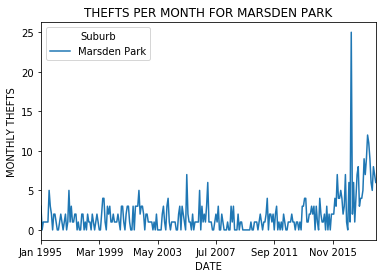

In [216]:
# ===================
# MARSDEN PARK THEFTS
# ===================

marsdenpark_theft_timeseries_plot = NSW_theft_df[NSW_theft_df.index == "Marsden Park"].transpose().plot()

# format graph
plt.xlabel("DATE")
plt.ylabel("MONTHLY THEFTS")
plt.title("THEFTS PER MONTH FOR MARSDEN PARK")
marsdenpark_house_count_timeseries_plot.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))


<center><h1>NUMBER OF HOUSES IN EACH SUBURB</h1></center>
<center><h1>+</h1></center>
<center><h1>AMOUNT OF THEFTS IN EACH SUBURB </h1></center>

In [217]:
# =====================
# ISOLATING 2018 THEFTS
# =====================

columns_to_drop = []

for column in NSW_theft_df.columns:
    if "2018" not in column:
        columns_to_drop.append(column)
        
NSW_2018_theft_df = NSW_theft_df.drop(columns_to_drop, axis=1)
NSW_2018_theft_df.index = [index.upper() for index in NSW_2018_theft_df.index] # index to uppercase to match house count data
NSW_2018_theft_df

Jan 2018  Feb 2018  Mar 2018  Apr 2018  \
AARONS PASS                          0         0         0         0   
ABBOTSBURY                           0         0         5         0   
ABBOTSFORD                           2         2         1         1   
ABERCROMBIE                          0         0         0         0   
ABERCROMBIE RIVER                    0         0         0         0   
ABERDARE                             6         4         2         0   
ABERDEEN                             1         4         0         1   
ABERFOYLE                            0         0         0         0   
ABERGLASSLYN                         3         0         4         3   
ABERMAIN                             1         0         3         1   
ABERNETHY                            0         0         0         0   
ABINGTON                             0         0         0         0   
ACACIA CREEK                         0         0         0         0   
ACACIA GARDENS                       0         3         1         1   
ADAMINABY                            0         0         2         0   
ADAMSTOWN                            5         3         6         7   
ADAMSTOWN HEIGHTS                    3         1         4         1   
ADELONG                              0         6         2         4   
ADJUNGBILLY                          0         0         0         0   
AFTERLEE                             0         0         0         0   
AGNES BANKS                          0         0         0         0   
AIRDS                                8         5         8         3   
AKOLELE                              0         0         0         0   
ALBERT                               1         1         1         0   
ALBION PARK                          4         1         4         1   
ALBION PARK RAIL                     2         4         2         2   
ALBURY                               6        13        13        20   
ALDAVILLA                            2         0         0         0   
ALECTOWN                             0         0         0         0   
ALEXANDRIA                          15        14        11        12   
...                                ...       ...       ...       ...   
YASS RIVER                           0         0         0         1   
YATHELLA                             0         0         0         0   
YATTALUNGA                           0         0         0         0   
YATTE YATTAH                         0         0         0         0   
YAVEN CREEK                          0         0         0         0   
YELGUN                               0         0         0         0   
YELLOW DAM                           0         0         0         0   
YELLOW PINCH                         0         0         0         0   
YELLOW ROCK (BLUE MOUNTAINS)         0         0         0         0   
YELLOW ROCK (SHELLHARBOUR)           0         0         0         0   
YENDA                                1         3         0         3   
YENNORA                              2         4         2         1   
YEOVAL                               0         0         0         1   
YERONG CREEK                         0         1         0         1   
YERRANDERIE                          1         0         0         0   
YERRINBOOL                           2         1         0         0   
YERRIYONG                            0         0         0         0   
YESSABAH                             0         0         0         0   
YETHOLME                             0         0         0         0   
YETMAN                               1         0         0         0   
YIPPIN CREEK                         0         0         0         1   
YOOGALI                              0         0         1         0   
YORKLEA                              0         0         1         0   
YOUNG                               10        11        11        18  

In [218]:
# ===========================
# ISOLATING 2018 HOUSE COUNTS
# ===========================

NSW_2018_suburb_house_count_df = NSW_suburb_house_count_df.drop(list(range(6)), axis=1)
NSW_2018_suburb_house_count_df = NSW_2018_suburb_house_count_df.drop(list(range(18, 25)), axis=1)
NSW_2018_suburb_house_count_df.columns = NSW_2018_theft_df.columns
NSW_2018_suburb_house_count_df

Jan 2018  Feb 2018  Mar 2018  Apr 2018  May 2018  Jun 2018  \
ABBOTSBURY           1132.0    1132.0    1132.0    1132.0    1132.0    1132.0   
ABBOTSFORD            864.0     864.0     864.0     864.0     864.0     864.0   
ABERCROMBIE           196.0     196.0     196.0     196.0     196.0     196.0   
ABERDARE              314.0     314.0     314.0     314.0     314.0     314.0   
ABERDEEN              343.0     343.0     343.0     343.0     343.0     343.0   
ABERGLASSLYN         1601.0    1601.0    1602.0    1602.0    1606.0    1606.0   
ABERMAIN              601.0     601.0     601.0     601.0     601.0     601.0   
ABERNETHY              19.0      19.0      19.0      19.0      19.0      19.0   
ACACIA CREEK            1.0       1.0       1.0       1.0       1.0       1.0   
ACACIA GARDENS       1048.0    1048.0    1048.0    1048.0    1048.0    1048.0   
ADAMINABY             109.0     109.0     109.0     109.0     109.0     109.0   
ADAMSTOWN            1981.0    1981.0    1981.0    1981.0    1981.0    1983.0   
ADAMSTOWN HEIGHTS    1879.0    1879.0    1879.0    1879.0    1879.0    1879.0   
ADELONG                68.0      68.0      68.0      68.0      68.0      68.0   
ADJUNGBILLY             1.0       1.0       1.0       1.0       1.0       1.0   
AFTERLEE                1.0       1.0       1.0       1.0       1.0       1.0   
AGNES BANKS           108.0     108.0     108.0     107.0     107.0     107.0   
AIRDS                1117.0    1117.0    1117.0    1117.0    1117.0    1117.0   
AKOLELE                50.0      50.0      50.0      50.0      50.0      50.0   
ALBERT                  5.0       5.0       5.0       5.0       5.0       5.0   
ALBION PARK          4042.0    4042.0    4062.0    4061.0    4062.0    4062.0   
ALBION PARK RAIL     2064.0    2064.0    2064.0    2064.0    2065.0    2068.0   
ALBURY               1912.0    1912.0    1912.0    1913.0    1913.0    1913.0   
ALDAVILLA              22.0      22.0      22.0      22.0      22.0      22.0   
ALECTOWN                1.0       1.0       1.0       1.0       1.0       1.0   
ALEXANDRIA            350.0     350.0     350.0     350.0     349.0     349.0   
ALFORDS POINT         892.0     892.0     892.0     892.0     892.0     892.0   
ALFREDTOWN              3.0       3.0       3.0       3.0       3.0       3.0   
ALICE                   1.0       1.0       1.0       1.0       1.0       1.0   
ALLAMBIE HEIGHTS     1960.0    1960.0    1960.0    1960.0    1960.0    1960.0   
...                     ...       ...       ...       ...       ...       ...   
ZETLAND                72.0      72.0      70.0      70.0      70.0      70.0   
LOUTH PARK              1.0       1.0       NaN       NaN       NaN       NaN   
NUMERALLA               NaN       NaN       NaN       NaN       NaN       NaN   
BAW BAW                 1.0       1.0       1.0       1.0       1.0       1.0   
CATHERINE FIELD       110.0     112.0     113.0     113.0     113.0     113.0   
GIRRAL                  1.0       1.0       1.0       1.0       1.0       1.0   
JELLAT JELLAT           1.0       1.0       1.0       1.0       1.0       1.0   
LIMEKILNS               2.0       2.0       2.0       NaN       NaN       NaN   
FAILFORD                1.0       1.0       1.0       1.0       1.0       1.0   
HUNTLEY                 2.0       3.0       3.0       3.0       3.0       3.0   
SHEEDYS GULLY           6.0       6.0       6.0       6.0       6.0       6.0   
TENANDRA                1.0       1.0       1.0       1.0       1.0       1.0   
WIRLINGA               27.0      27.0      27.0      27.0      27.0      27.0   
CANADIAN LEAD           NaN       1.0       1.0       1.0       1.0       1.0   
LEN WATERS ESTATE       NaN       1.0       1.0       1.0       1.0       1.0   
COOPERS GULLY           NaN       NaN       NaN       1.0       1.0       1.0   
KENTUCKY SOUTH          NaN       NaN       NaN       NaN       NaN       1.0   
LITTLE BACK CREEK       NaN       NaN       NaN   

In [421]:
import numpy as np
from scipy import stats

def scatter_plot_suburb_crime_house_count(suburb):
    s1 = NSW_2018_theft_df.loc[suburb].rename("CRIMES")
    s2 = NSW_2018_suburb_house_count_df.loc[suburb].rename("HOUSE COUNT")
    df1 = pd.concat([s1, s2], axis=1, sort=False)
    plot1 = df1.plot.scatter("HOUSE COUNT", "CRIMES")
    z = np.polyfit(s2, s1, 2)
    p = np.poly1d(z)
    trendline_xrange = np.linspace(int(s2.min()), int(s2.max()), num=50)
    plot1.plot(trendline_xrange, p(trendline_xrange), "r--")
    plt.title(suburb)
    print(suburb + " correlation coefficient: " + str(stats.pearsonr(s2, s1)[0]))  # correlation coefficient

greenfield_development_suburb_list = ["BOX HILL",
                                      "COLEBEE",
                                      "MARSDEN PARK",
                                      "KELLYVILLE",
                                      "RIVERSTONE",
                                      "SCHOFIELDS",
                                      "ROUSE HILL",
                                      "VINEYARD",
                                      "SCHOFIELDS",
                                      "AUSTRAL",
                                      "CATHERINE FIELD",
                                      "EDMONDSON PARK",
                                      "LEPPINGTON",
                                      "ORAN PARK"]

BOX HILL correlation coefficient: 0.7598542922603073
COLEBEE correlation coefficient: 0.19635227746952635
MARSDEN PARK correlation coefficient: -0.4845569992505478
KELLYVILLE correlation coefficient: 0.580286936219291
RIVERSTONE correlation coefficient: 0.18156832707125947
SCHOFIELDS correlation coefficient: -0.022628086664497428
ROUSE HILL correlation coefficient: -0.4292896889545853
VINEYARD correlation coefficient: nan
SCHOFIELDS correlation coefficient: -0.022628086664497428


C:\Users\elija\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RankWarning: Polyfit may be poorly conditioned
  if __name__ == '__main__':


AUSTRAL correlation coefficient: 0.6543611529925184
CATHERINE FIELD correlation coefficient: -0.23855698923894916
EDMONDSON PARK correlation coefficient: -0.07688726265723382
LEPPINGTON correlation coefficient: 0.07340208171971928
ORAN PARK correlation coefficient: 0.5098941710480028


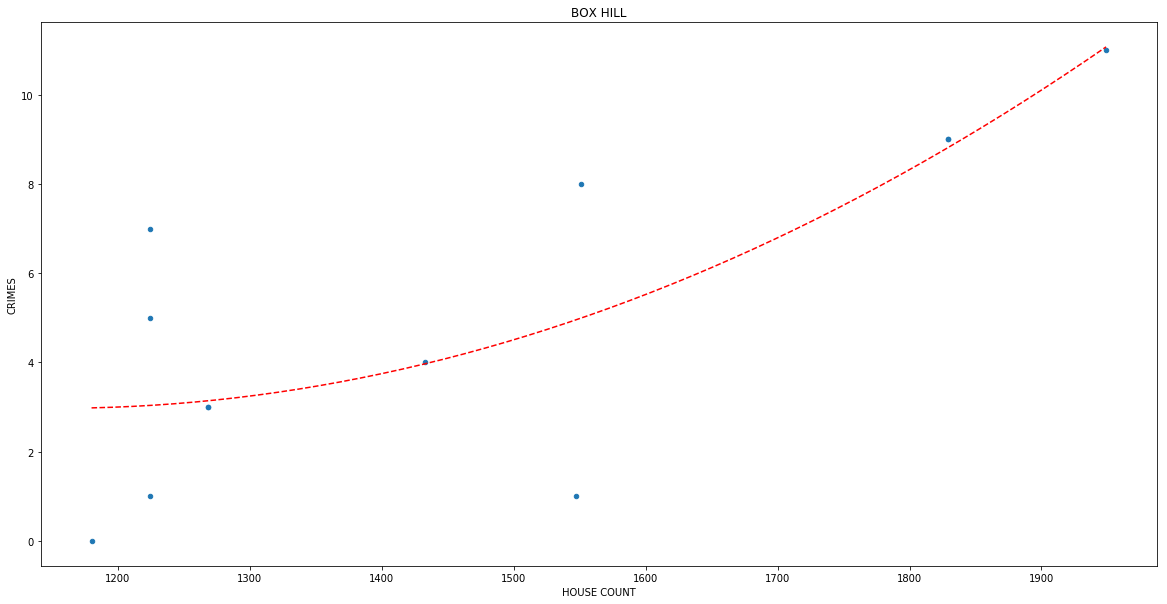

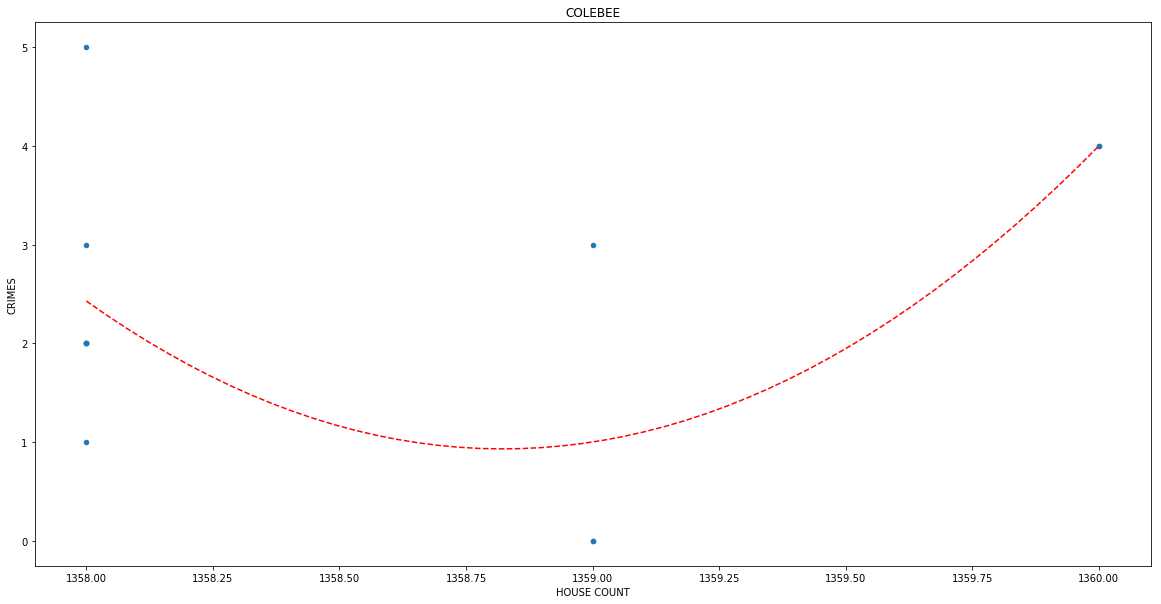

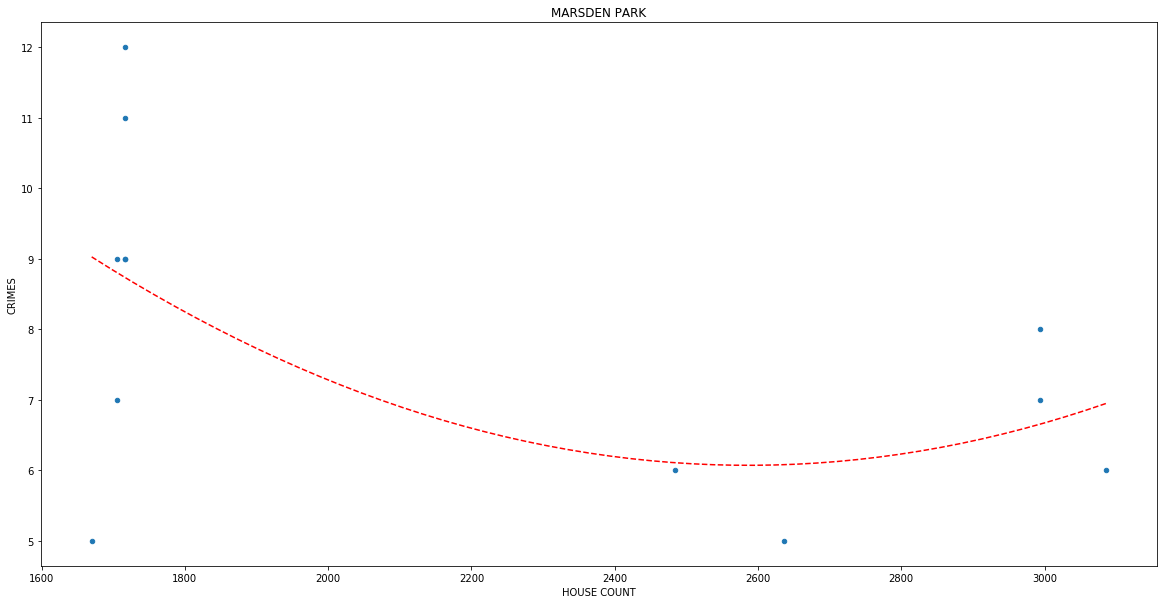

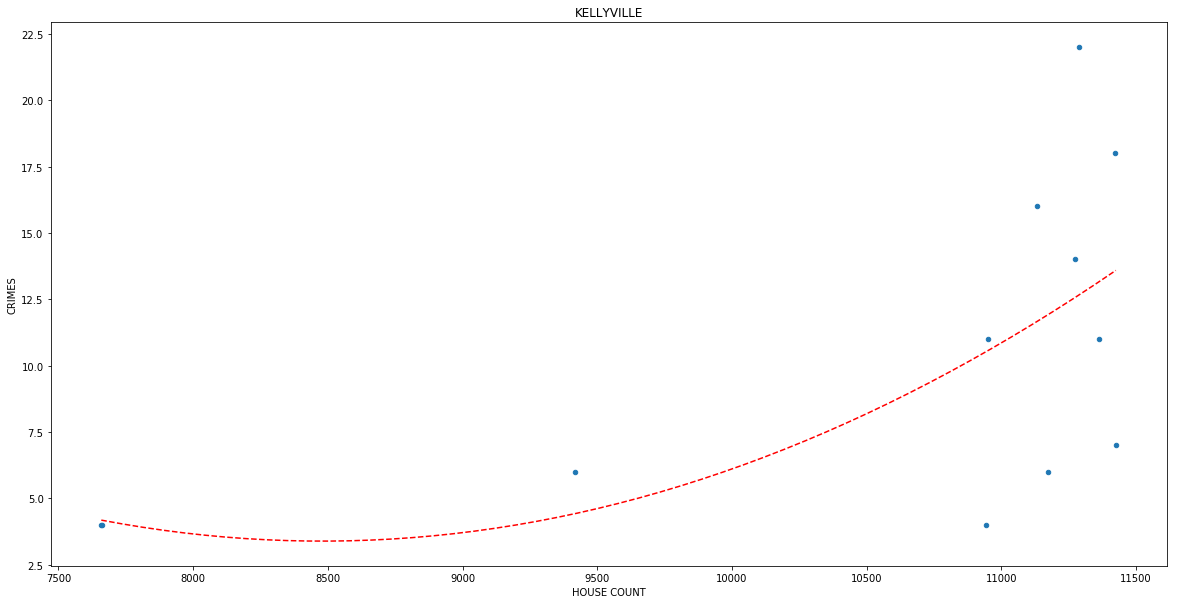

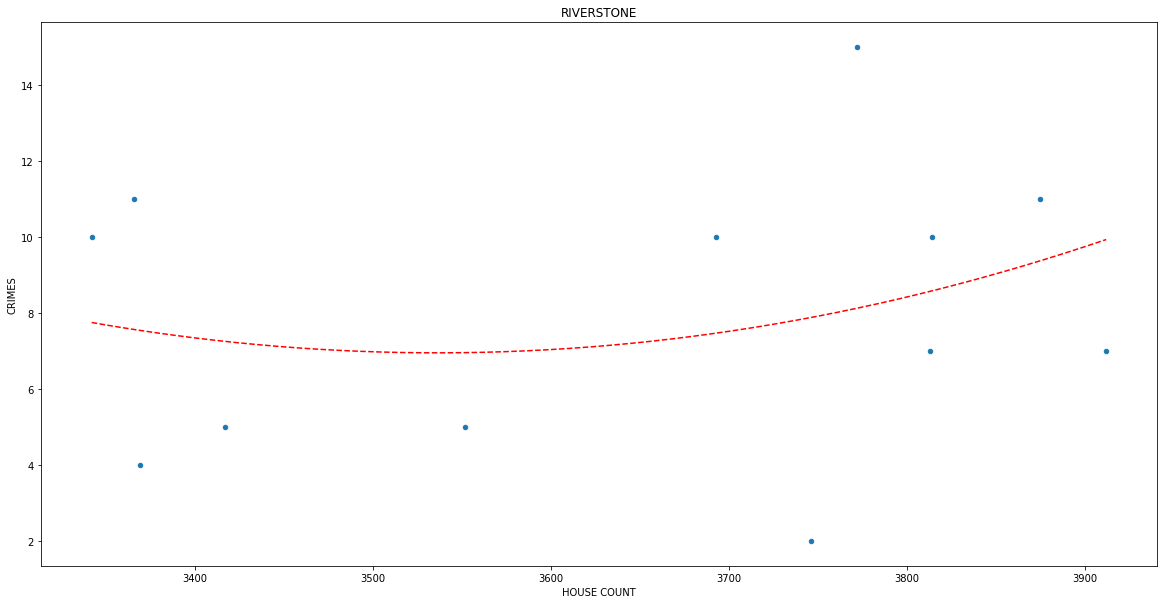

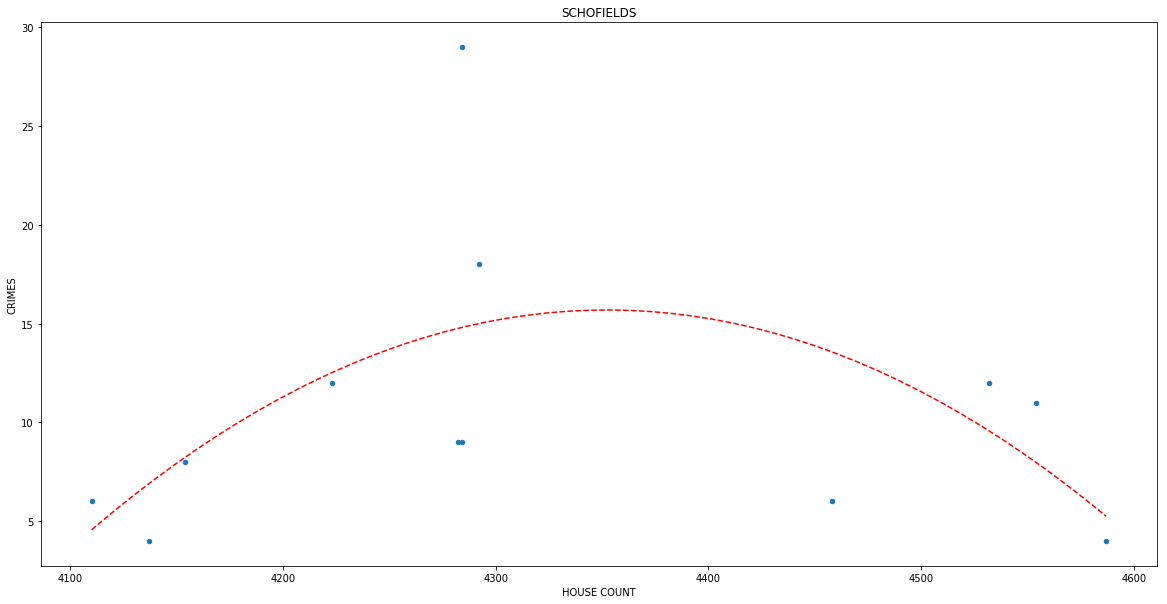

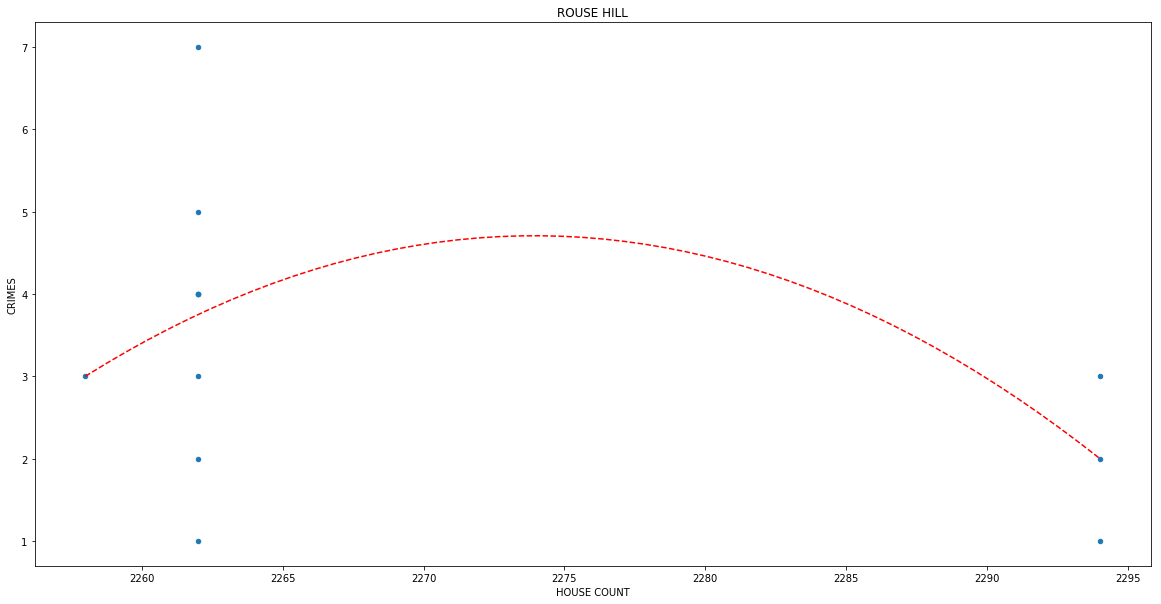

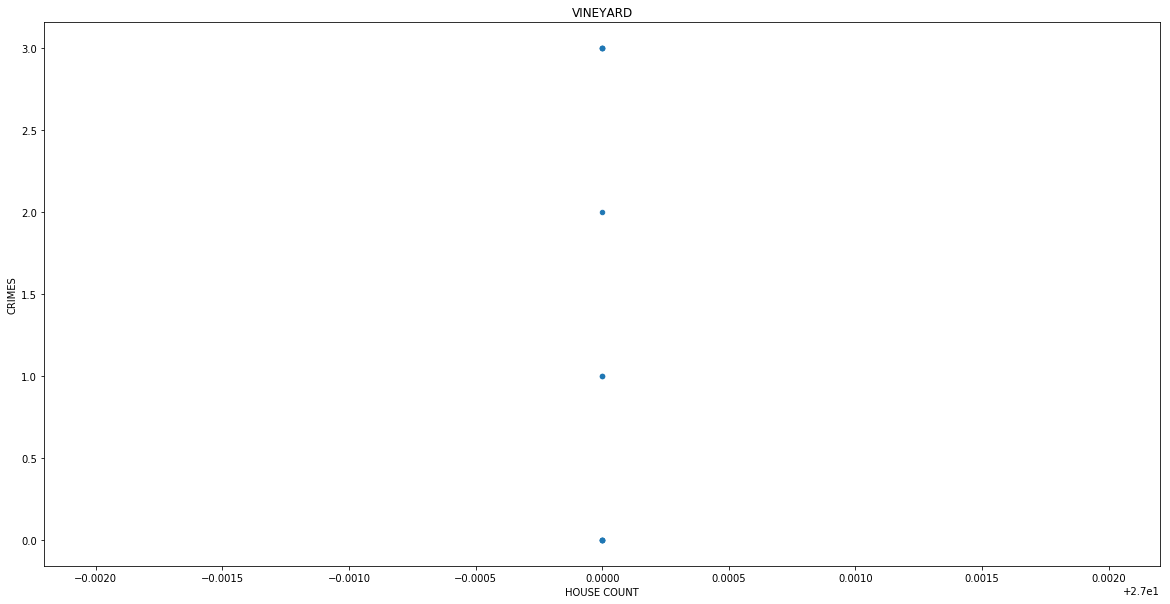

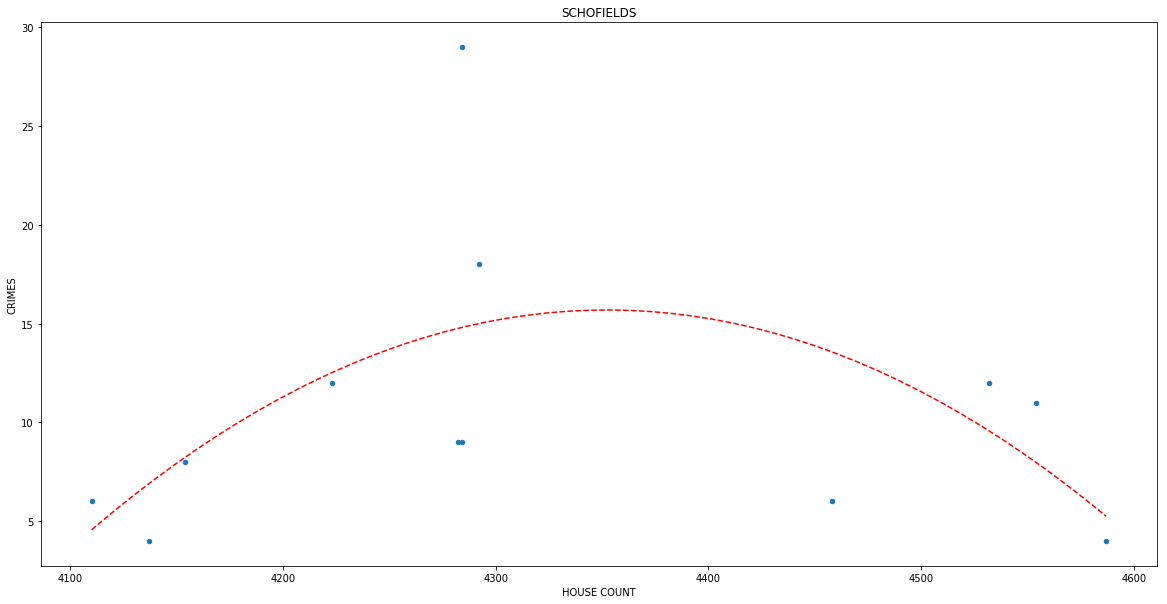

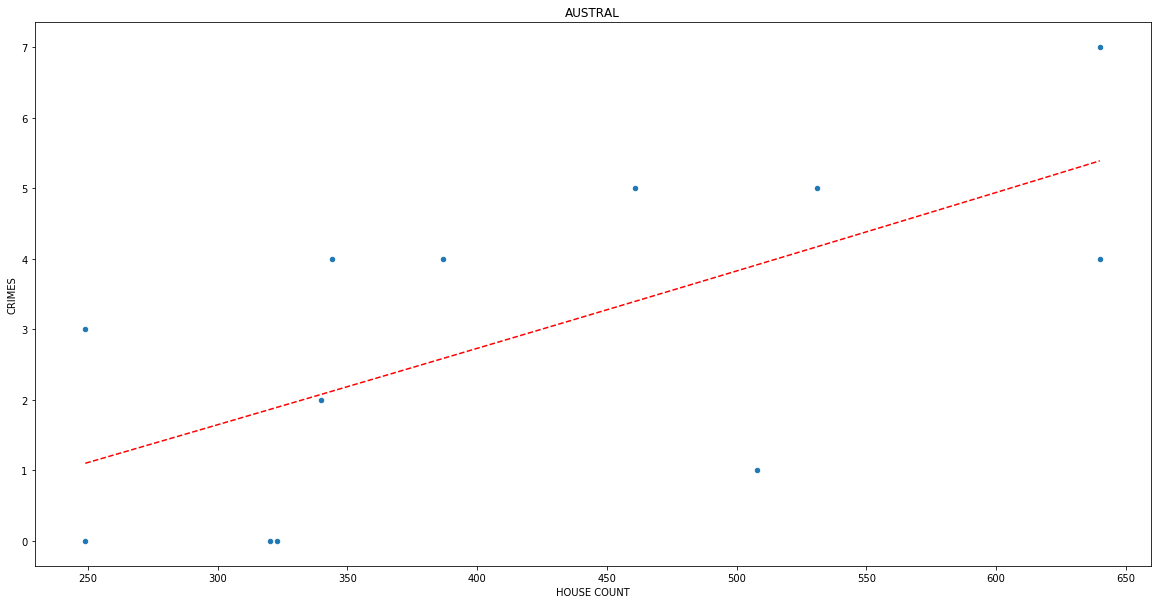

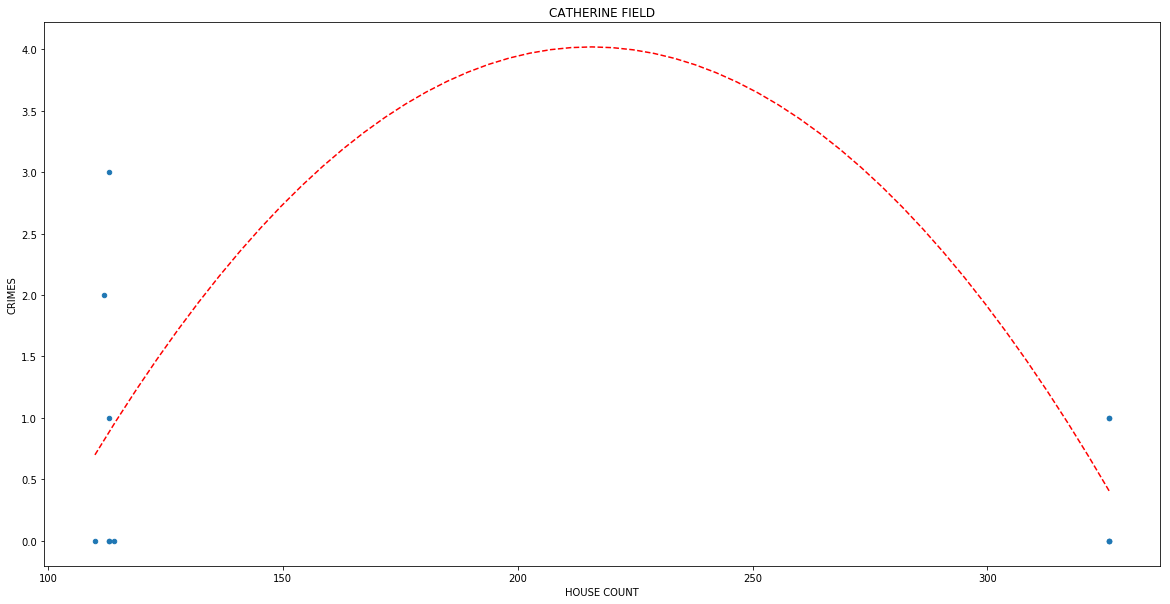

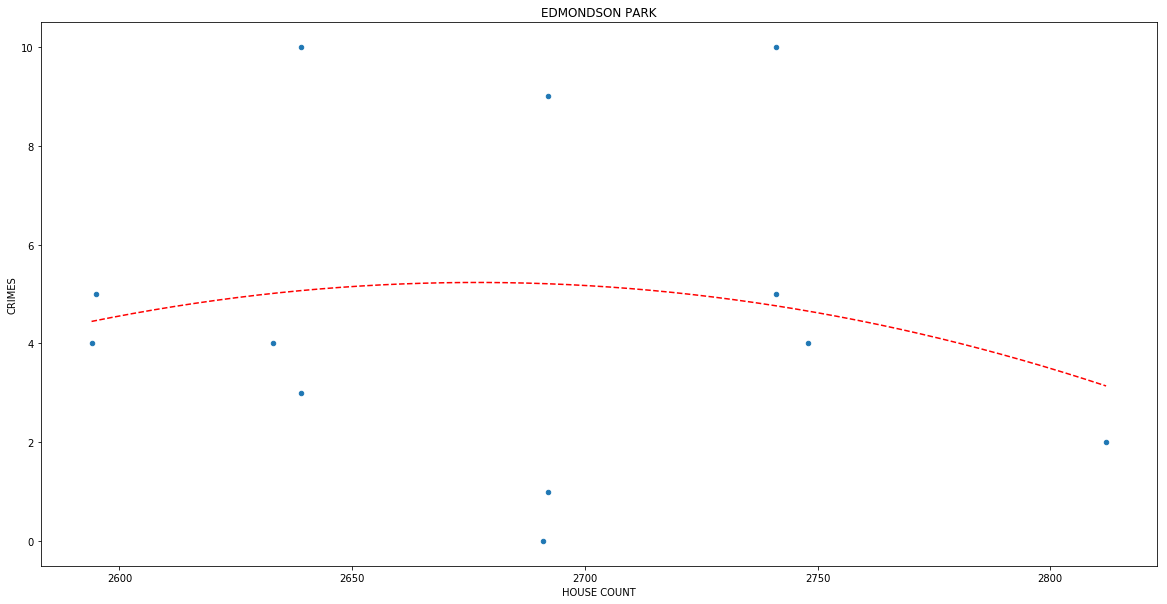

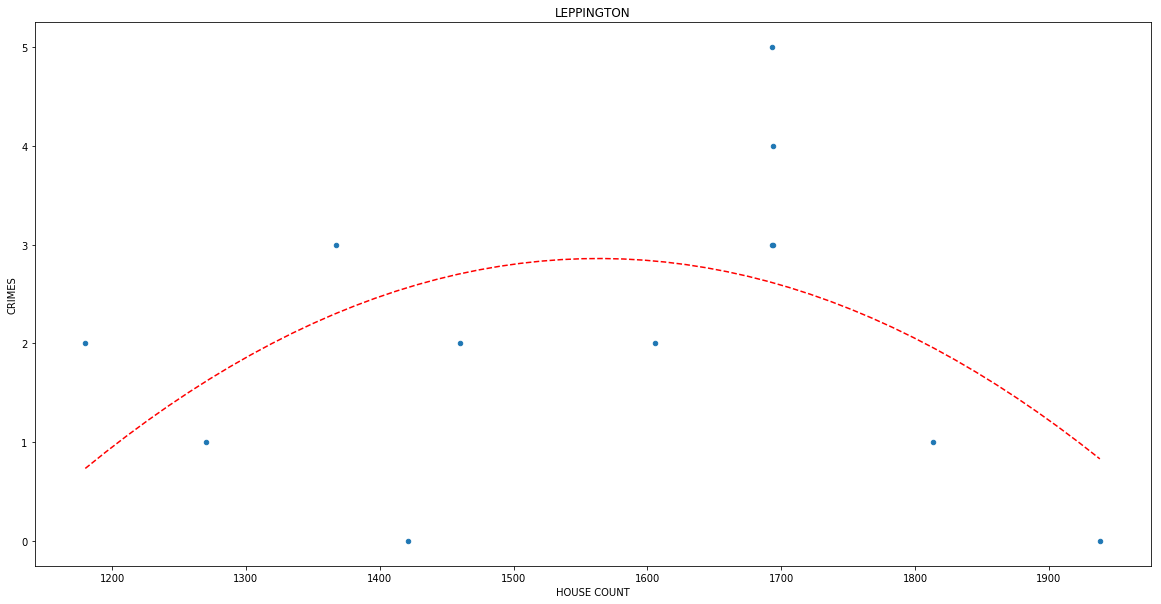

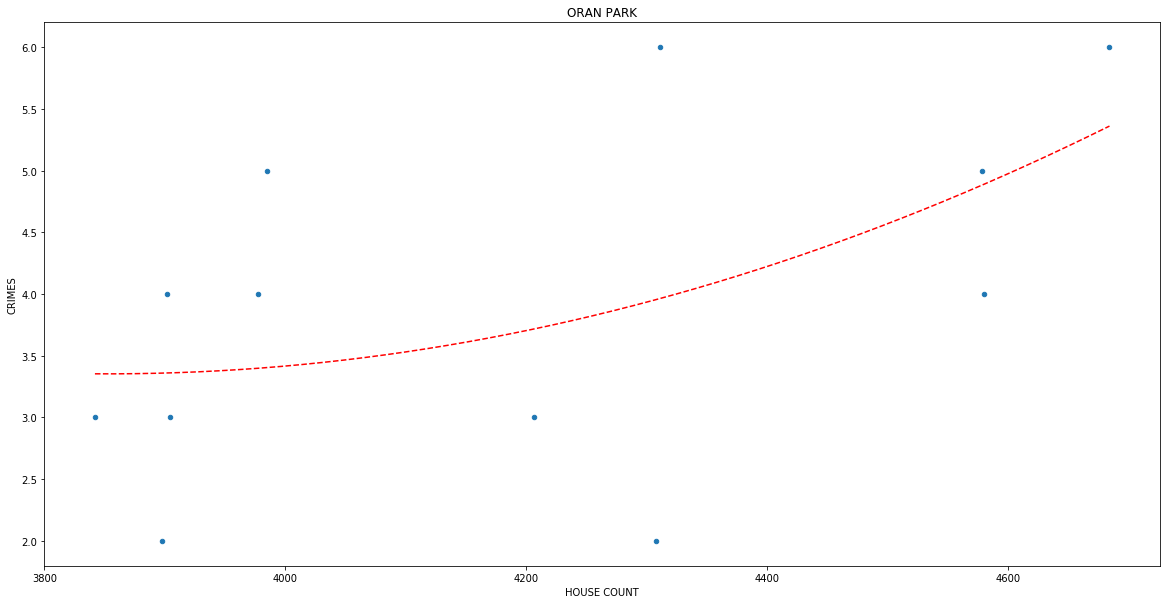

In [422]:
for greenfield_development_suburb in greenfield_development_suburb_list:
    scatter_plot_suburb_crime_house_count(greenfield_development_suburb)

In [392]:
import os
import geopandas as gp
import shapely
import fiona
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

shp_file_name = "NSW_LOCALITY_POLYGON_shp/NSW_LOCALITY_POLYGON_shp.shp"
zip_file_name = "nsw_locality_polygon_shp.zip"
web_file_path = ("https://data.gov.au/dataset/91e70237-d9d1-4719-a82f-e71b811154c6/resource/"
                 "5e295412-357c-49a2-98d5-6caf099c2339/download/nsw_locality_polygon_shp.zip")


%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

def unzip_zipfile(zipped_file_path, put_it_here="."):
    import zipfile
    zip_of_suburbs = zipfile.ZipFile(zipped_file_path, 'r')
    zip_of_suburbs.extractall(put_it_here)
    zip_of_suburbs.close()
    
# Get the data loaded. This is a bit complicated because it's online as a zip file.
# If we don't have it right now, we need to get it and unzip it.
if os.path.isfile(shp_file_name):
    print("loading from file")
else:
    if os.path.isfile(zip_file_name):
        print("unzipping")
        unzip_zipfile(zip_file_name)
    else:
        import requests
        print("loading from the internet")
        page = requests.get(web_file_path)
        with open(zip_file_name, 'wb') as z:
            z.write(page.content)
        unzip_zipfile(zip_file_name)

print("done")

loading from file
done


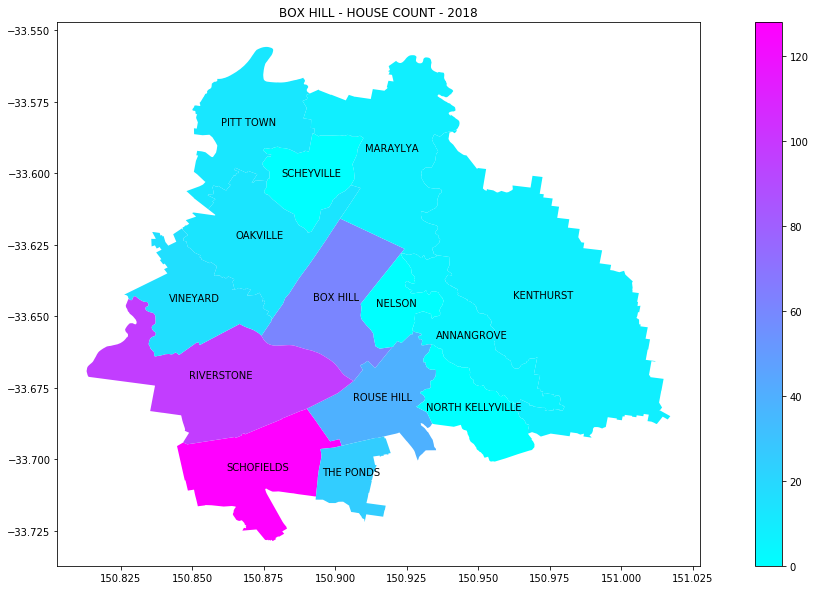

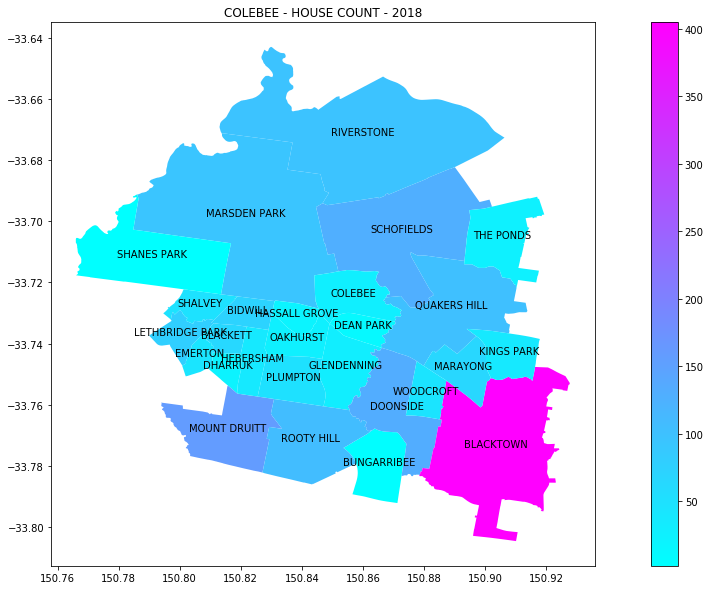

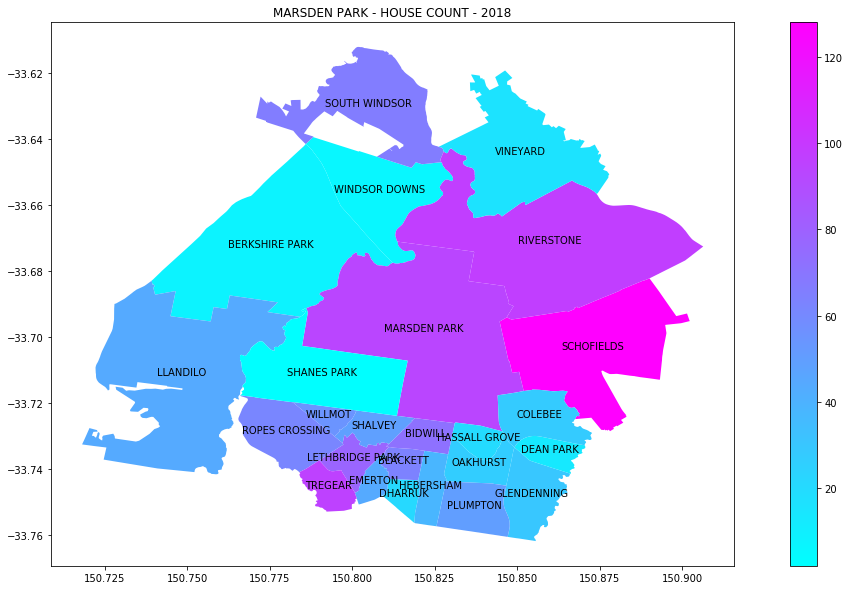

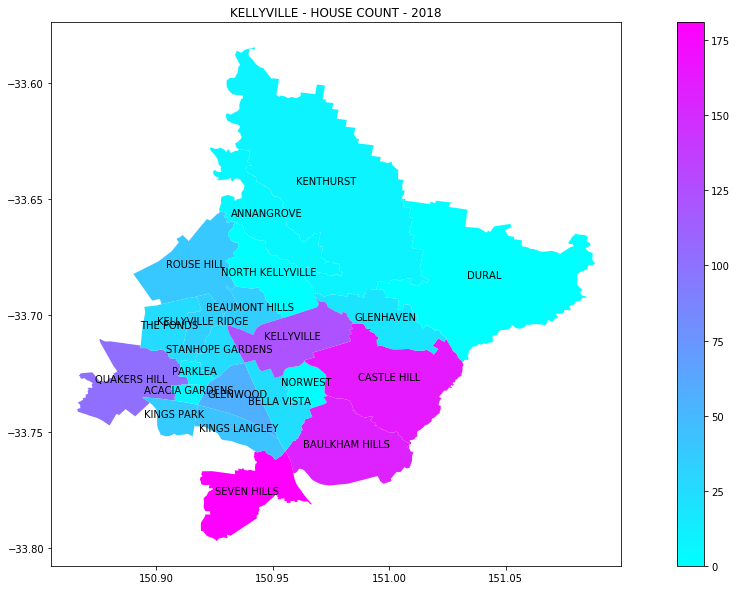

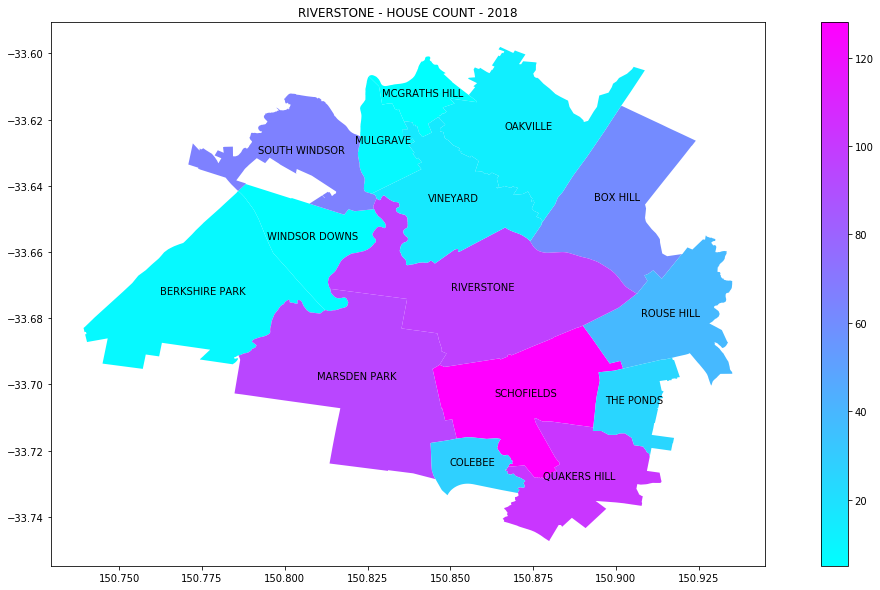

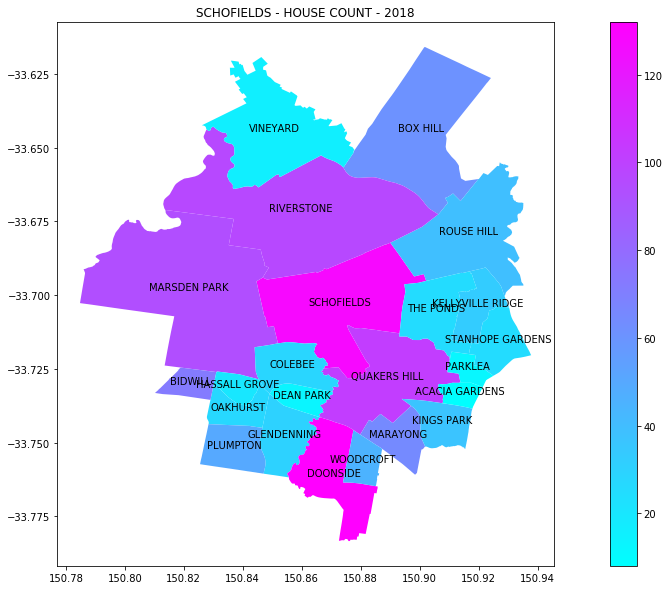

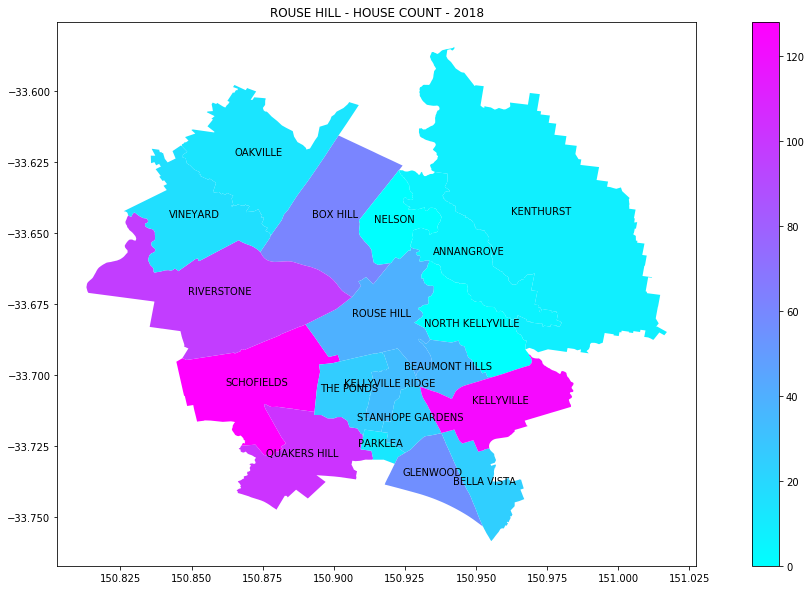

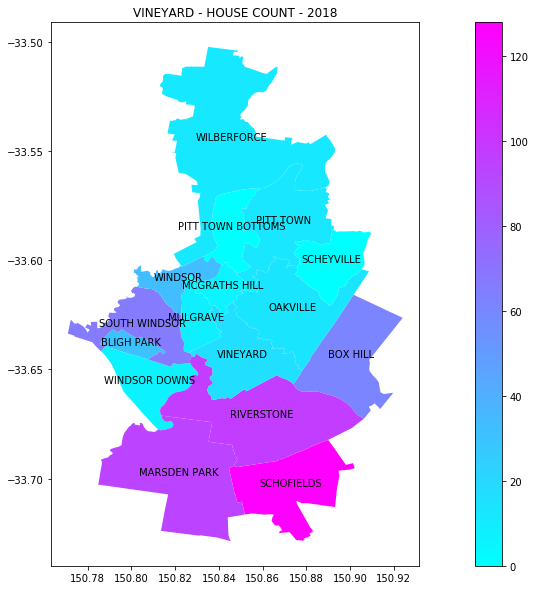

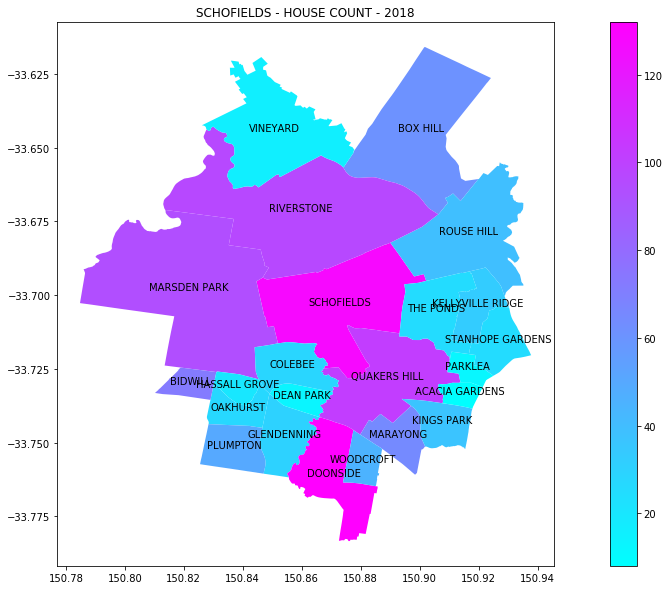

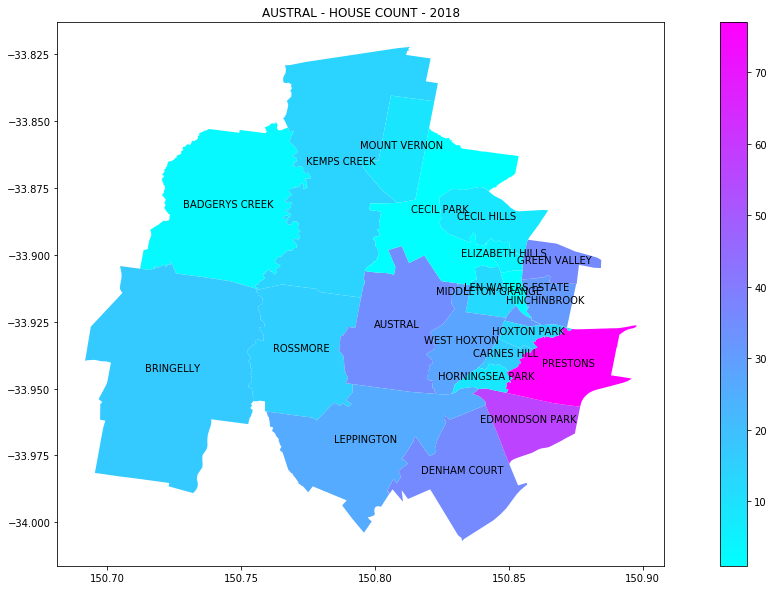

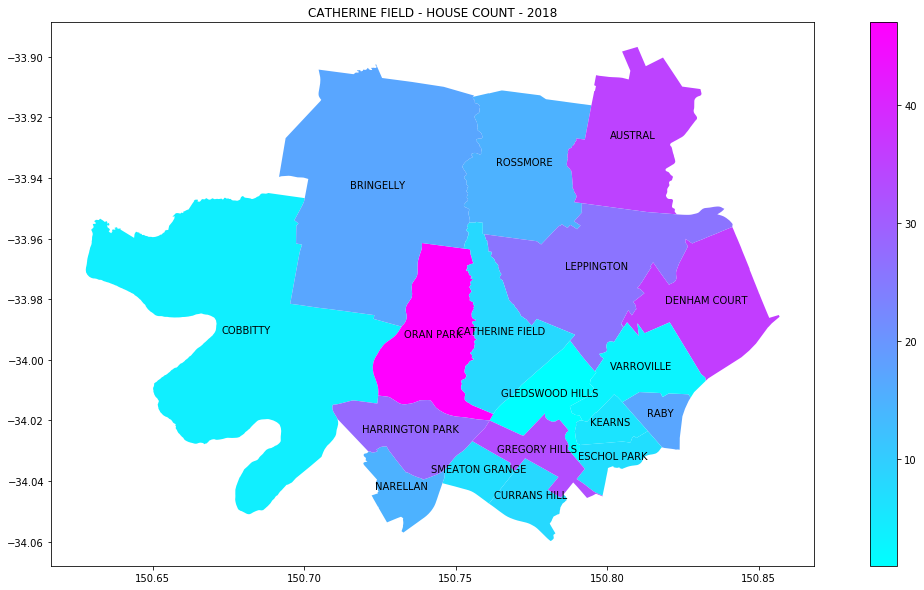

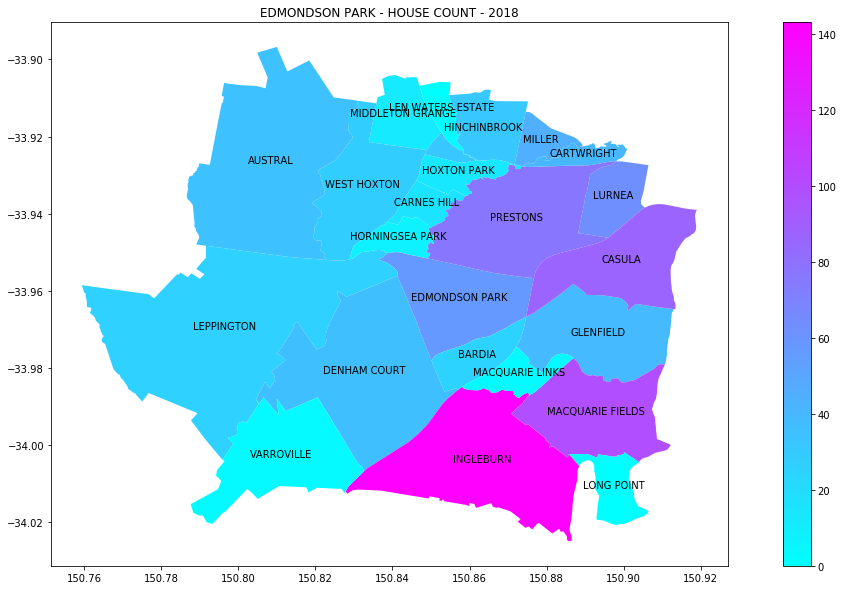

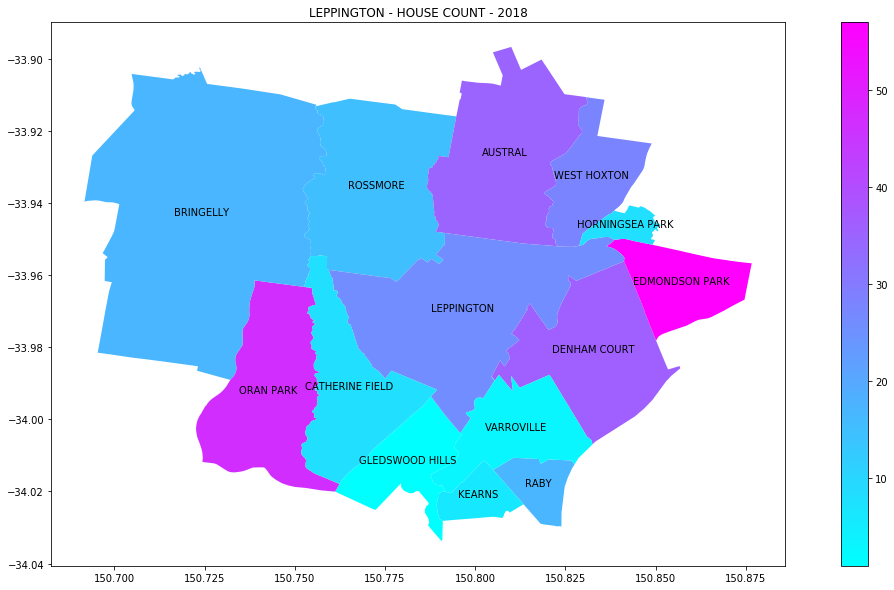

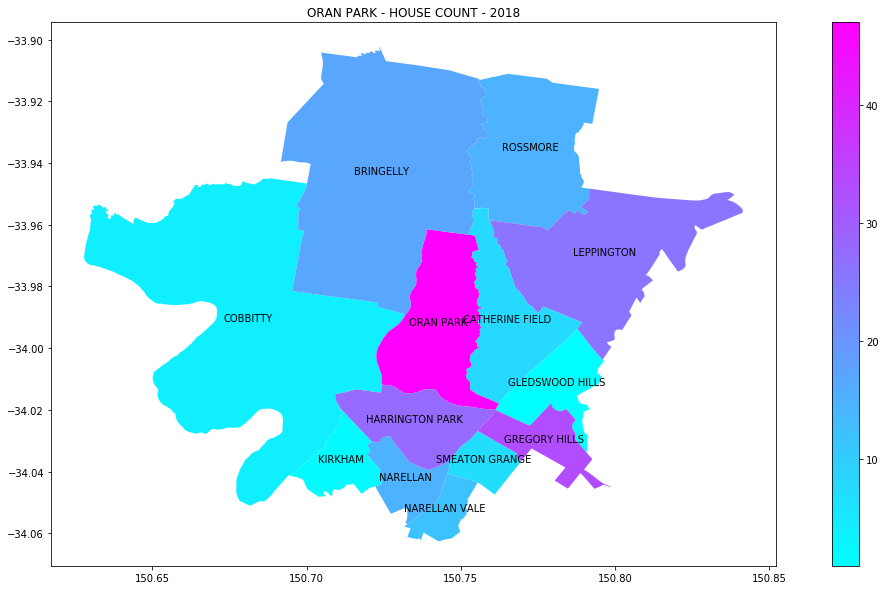

In [420]:
burbs = gp.GeoDataFrame.from_file(shp_file_name)
burbs.drop(["NSW_LOCA_1", "NSW_LOCA_3", "NSW_LOCA_4", "DT_RETIRE"], axis=1, inplace=True)

burbs.index = burbs["NSW_LOCA_2"]

def add_centroid(row):
    return row.geometry.centroid

burbs["CENTROID"] = burbs.apply(add_centroid, axis=1)

def plot_data_series_for_burbs_close_to_specific_burb(specific_burb, distance, target_df, source_series, dataset_name):
    column_name = dataset_name + " - " + source_series.name
    for idx in target_df.index:
        if idx in source_series.index:
            target_df.loc[idx, column_name] = source_series[idx]
        else:
            target_df.loc[idx, column_name] = 0
    target_df[column_name] = target_df[column_name].replace(np.nan, 0)  # need to replace this
    
    specific_burb_centroid = burbs.loc[specific_burb, "CENTROID"]
    burbs["distance_from_" + specific_burb] = burbs.geometry.distance(specific_burb_centroid)
    close_burbs = burbs[burbs["distance_from_" + specific_burb] < distance]
    close_burbs.plot(column=column_name, cmap='cool', legend=True)
    
    for idx, row in close_burbs.iterrows():
        plt.annotate(s=idx, 
                     xy=tuple(row.CENTROID.coords)[0],
                     horizontalalignment='center')
    plt.title(specific_burb + " - " + column_name.upper())


# MAKE THEFT PER HOUSE DATASET
    
for greenfield_development_suburb in greenfield_development_suburb_list: 
    plot_data_series_for_burbs_close_to_specific_burb(greenfield_development_suburb, 
                                                      0.05, 
                                                      burbs, 
                                                      NSW_2018_theft_df.sum(axis=1).rename("2018"), 
                                                      "HOUSE COUNT")

# CONCLUSION

# THIS RESEARCH IS INCONCLUSIVE
# NEED MORE DATA AND CASES OF RESIDENTIAL DEVELOPMENTS TO PROVE VIA TIMESERIES
# TOO MANY FACTORS TO CONSIDER
# BIAS DUE TO FIRST TIME BEING A PART OF A FACEBOOK GROUP


# INTERESTING THINGS

'Dec 2018'

In [ ]:
# MOST EXPENSIVE SUBURBS

In [68]:
NSW_crime_df[:][(NSW_crime_df["Subcategory"].str.contains("ecstasy") == True) & (NSW_crime_df["Suburb"] == "Penrith")]

Suburb Offence category                       Subcategory  Jan 1995  \
194651  Penrith    Drug offences  Possession and/or use of ecstasy         0   
194657  Penrith    Drug offences   Dealing, trafficking in ecstasy         0   

        Feb 1995  Mar 1995  Apr 1995  May 1995  Jun 1995  Jul 1995  ...  \
194651         0         0         0         0         0         0  ...   
194657         0         0         0         0         0         0  ...   

        Mar 2018  Apr 2018  May 2018  Jun 2018  Jul 2018  Aug 2018  Sep 2018  \
194651         0         0         0         0         0         0        33   
194657         0         0         0         0         0         0         8   

        Oct 2018  Nov 2018  Dec 2018  
194651         0         1         1  
194657         0         0         0  

[2 rows x 291 columns]

# THE RESULTS